In [ ]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE

# Importer les données et élimination colonnes redondantes

In [ ]:
pd.set_option('display.max_columns', None)
data = pd.read_csv("datasets/VisaPremier.txt", sep="\t")
data.head()

,matricul,departem,ptvente,sexe,age,sitfamil,anciente,csp,codeqlt,nbimpaye,mtrejet,nbopguic,moycred3,aveparmo,endette,engagemt,engagemc,engagemm,nbcptvue,moysold3,moycredi,agemvt,nbop,mtfactur,engageml,nbvie,mtvie,nbeparmo,mteparmo,nbeparlo,mteparlo,nblivret,mtlivret,nbeparlt,mteparlt,nbeparte,mteparte,nbbon,mtbon,nbpaiecb,nbcb,nbcbptar,avtscpte,aveparfi,cartevp,sexer,cartevpr,nbjdebit
0,148009,31,1,Shom,51,Fmar,238,Pcad,A,0,0,0,115,701939,4,119216,0,119216,2,35938,114,11,49,206016,0,1,152530,4,701939,2,520145,2,181794,0,0,0,0,0,0,14,2,0,1303700,556967,Coui,0,1,1
1,442153,82,6,Shom,52,Fmar,270,Pcad,A,0,0,4,19579,8920,0,0,0,0,1,132468,4079,11,50,98500,0,0,0,3,19508920,2,8920,0,0,0,0,0,0,1,19500000,5,2,0,19856243,133896,Coui,0,1,0
2,552427,97,1,Shom,58,Fmar,139,Pcad,C,0,0,0,40,3402,0,0,0,0,1,1336,40,14,2,3394,0,0,0,1,3402,0,0,1,3402,0,0,0,0,0,0,0,1,0,122745,0,Coui,0,1,0
3,556005,40,1,Shom,27,Fcel,99,Psan,B,0,0,0,17,76321,0,0,0,0,1,12221,17,11,23,0,0,0,0,3,76321,1,46312,2,30009,0,0,0,0,0,0,14,2,0,83224,0,Coui,0,1,0
4,556686,65,1,Shom,49,Fsep,89,Pemp,A,0,0,0,374,473350,0,209062,37859,171203,1,21187,208,11,49,0,0,1,21423,5,473350,3,399999,2,73351,0,0,0,0,0,0,11,3,1,494773,21423,Coui,0,1,15


In [ ]:
data["cartevpr"].value_counts()

0    714
1    359
Name: cartevpr, dtype: int64

In [ ]:
data = data.drop(columns=['matricul', 'sexe', "cartevp"])
data = data.astype({
    "departem":"category",
    "ptvente":"category",
    "sitfamil":"category",
    "csp":"category",
    "codeqlt":"category",
    "sexer":"category",
    "cartevpr":"category"
})
data.head()

,departem,ptvente,age,sitfamil,anciente,csp,codeqlt,nbimpaye,mtrejet,nbopguic,moycred3,aveparmo,endette,engagemt,engagemc,engagemm,nbcptvue,moysold3,moycredi,agemvt,nbop,mtfactur,engageml,nbvie,mtvie,nbeparmo,mteparmo,nbeparlo,mteparlo,nblivret,mtlivret,nbeparlt,mteparlt,nbeparte,mteparte,nbbon,mtbon,nbpaiecb,nbcb,nbcbptar,avtscpte,aveparfi,sexer,cartevpr,nbjdebit
0,31,1,51,Fmar,238,Pcad,A,0,0,0,115,701939,4,119216,0,119216,2,35938,114,11,49,206016,0,1,152530,4,701939,2,520145,2,181794,0,0,0,0,0,0,14,2,0,1303700,556967,0,1,1
1,82,6,52,Fmar,270,Pcad,A,0,0,4,19579,8920,0,0,0,0,1,132468,4079,11,50,98500,0,0,0,3,19508920,2,8920,0,0,0,0,0,0,1,19500000,5,2,0,19856243,133896,0,1,0
2,97,1,58,Fmar,139,Pcad,C,0,0,0,40,3402,0,0,0,0,1,1336,40,14,2,3394,0,0,0,1,3402,0,0,1,3402,0,0,0,0,0,0,0,1,0,122745,0,0,1,0
3,40,1,27,Fcel,99,Psan,B,0,0,0,17,76321,0,0,0,0,1,12221,17,11,23,0,0,0,0,3,76321,1,46312,2,30009,0,0,0,0,0,0,14,2,0,83224,0,0,1,0
4,65,1,49,Fsep,89,Pemp,A,0,0,0,374,473350,0,209062,37859,171203,1,21187,208,11,49,0,0,1,21423,5,473350,3,399999,2,73351,0,0,0,0,0,0,11,3,1,494773,21423,0,1,15


On remarque qu'il y'a des valeurs manquantes représentées par des points "." ou bien "F." pour la variable codeqlt.
Dans les prochaines étapes, nous allons d'abord évaluer le nombre de valeurs manquantes, puis les traiter selon leur fréquence dans chacune des variables. 
# Traitement des valeurs manquantes

## Nombre de valeurs manquantes par variable

In [ ]:
pd.concat([((data==".") | (data == "F.")).sum(), data.dtypes], axis=1, keys=["# valeurs manquantes", "Type"]).sort_values(by=['# valeurs manquantes'], ascending=False)

c:\users\asus\appdata\local\programs\python\python37-32\lib\site-packages\pandas\core\ops\array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


,# valeurs manquantes,Type
nbpaiecb,278,object
codeqlt,133,category
sitfamil,32,category
departem,7,category
agemvt,6,object
nbeparte,0,int64
mteparmo,0,int64
nbeparlo,0,int64
mteparlo,0,int64
nblivret,0,int64


In [ ]:
data = data.replace(".", np.nan) # remplacer . et F. avec NaN pour pouvoir utiliser dropna
data = data.replace("F.", np.nan)

In [ ]:
for c in data.columns:
    print(c)
    print(data[c].value_counts())
    print()
    print()

departem
31    691
65    141
82     69
32     69
75     14
64      9
97      8
9       7
81      7
92      6
11      5
66      4
94      3
13      3
47      3
24      3
40      3
12      2
17      2
46      2
69      2
33      2
14      1
16      1
34      1
78      1
45      1
54      1
95      1
6       1
63      1
77      1
56      1
Name: departem, dtype: int64


ptvente
1    694
2    167
3    132
4     51
5     22
7      5
6      2
Name: ptvente, dtype: int64


age
42    36
52    35
47    34
32    31
36    31
46    30
50    29
51    29
43    28
49    28
31    28
39    28
40    28
41    27
35    27
27    27
37    27
34    26
28    26
45    26
48    25
54    25
56    25
60    25
30    24
53    24
55    24
38    23
44    23
57    21
26    21
22    21
59    20
64    19
29    19
58    18
33    18
62    18
24    16
25    15
19    13
65    12
61    11
23     9
21     9
63     9
20     4
18     1
Name: age, dtype: int64


sitfamil
Fmar    547
Fcel    360
Fdiv     86
Fuli     25
Fsep     1

Les variables ayant des valeurs manquantes sont : 

|Variable| Nombre de valeurs manquantes| Résolution   |
| ---      | --- | ---                                | 
| departem | 7   |  Enlever obs                       |
| codqlt   | 133 |  Remplacer par un code "INCONNU"   |
| agemvt   | 6   |  Enlever obs                       |
| nbpaiecb | 278 |  Remplacer par la moyenne          | 
| sitfamil | 32  |  Enlever obs                       |

Eliminer toutes les observations nous laisse avec seulement 722 observations

# Imputation
# Par la moyenne

In [ ]:
nbpaie_cb_mean = data[data["nbpaiecb"].isna() == False]["nbpaiecb"].astype("int64").mean(skipna=True)

In [ ]:
data["nbpaiecb"] = data["nbpaiecb"].replace(np.nan, nbpaie_cb_mean)

## Individus avec NA

In [ ]:
data = data.dropna()

In [ ]:
data.shape

(897, 45)

In [ ]:
data.describe()

,age,anciente,nbimpaye,mtrejet,nbopguic,moycred3,aveparmo,endette,engagemt,engagemc,engagemm,nbcptvue,moysold3,moycredi,nbop,mtfactur,engageml,nbvie,mtvie,nbeparmo,mteparmo,nbeparlo,mteparlo,nblivret,mtlivret,nbeparlt,mteparlt,nbeparte,mteparte,nbbon,mtbon,nbcb,nbcbptar,avtscpte,aveparfi,nbjdebit
count,897.000000,897.000000,897.0,897.000000,897.000000,897.000000,897.000000,897.000000,8.970000e+02,897.000000,8.970000e+02,897.00000,897.000000,897.000000,897.000000,8.970000e+02,8.970000e+02,897.000000,8.970000e+02,897.000000,8.970000e+02,897.000000,897.000000,897.000000,897.000000,897.000000,897.000000,897.000000,897.000000,897.000000,8.970000e+02,897.000000,897.000000,8.970000e+02,8.970000e+02,897.000000
mean,42.934225,162.002230,0.0,-0.086957,1.683389,52.451505,62171.147157,6.157191,8.425793e+04,4594.144928,2.197047e+04,1.12709,11829.198439,28.409142,32.855072,2.540777e+04,5.769332e+04,0.259755,3.663745e+04,1.531773,8.393386e+04,0.657748,35325.225195,0.807135,22028.391304,0.062430,4817.530658,0.003344,23.577480,0.001115,2.173913e+04,1.170569,0.144928,1.595373e+05,5.332775e+04,13.278707
std,11.566245,157.142593,0.0,1.726635,2.876568,657.722798,119373.122517,13.017452,2.529524e+05,23427.079246,7.847995e+04,0.41392,24986.697629,143.830338,26.977445,7.863897e+04,2.314675e+05,0.837511,2.931833e+05,1.342699,6.601851e+05,0.818268,79361.707847,0.800136,55804.954007,0.310716,35626.082488,0.057767,706.144557,0.033389,6.510860e+05,0.849700,0.394096,7.991250e+05,3.614797e+05,24.004471
min,19.000000,1.000000,0.0,-51.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.00000,-70050.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000
25%,34.000000,54.000000,0.0,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,1.00000,1352.000000,5.000000,12.000000,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,1.000000,0.000000,5.506000e+03,0.000000e+00,0.000000
50%,43.000000,141.000000,0.0,0.000000,1.000000,13.000000,9300.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,1.00000,5169.000000,12.000000,29.000000,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,1.000000,9.510000e+03,0.000000,0.000000,1.000000,188.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,1.000000,0.000000,2.862200e+04,0.000000e+00,0.000000
75%,52.000000,218.000000,0.0,0.000000,2.000000,30.000000,67963.000000,8.000000,5.000000e+04,0.000000,0.000000e+00,1.00000,12070.000000,26.000000,47.000000,1.000000e+04,0.000000e+00,0.000000,0.000000e+00,2.000000,6.877700e+04,1.000000,29917.000000,1.000000,25000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,2.000000,0.000000,1.223150e+05,1.352000e+03,14.000000
max,65.000000,870.000000,0.0,0.000000,28.000000,19579.000000,901767.000000,99.000000,3.472938e+06,500780.000000,1.618242e+06,4.00000,241827.000000,4079.000000,262.000000,1.331530e+06,3.472938e+06,13.000000,5.449561e+06,9.000000,1.950892e+07,4.000000,579603.000000,4.000000,559730.000000,6.000000,559559.000000,1.000000,21149.000000,1.000000,1.950000e+07,5.000000,4.000000,1.985624e+07,7.066619e+06,114.000000


La variable nbimpaye a une variance nulle, celle-ci est donc inutile

In [ ]:
data.dtypes

departem    category
ptvente     category
age            int64
sitfamil    category
anciente       int64
csp         category
codeqlt     category
nbimpaye       int64
mtrejet        int64
nbopguic       int64
moycred3       int64
aveparmo       int64
endette        int64
engagemt       int64
engagemc       int64
engagemm       int64
nbcptvue       int64
moysold3       int64
moycredi       int64
agemvt        object
nbop           int64
mtfactur       int64
engageml       int64
nbvie          int64
mtvie          int64
nbeparmo       int64
mteparmo       int64
nbeparlo       int64
mteparlo       int64
nblivret       int64
mtlivret       int64
nbeparlt       int64
mteparlt       int64
nbeparte       int64
mteparte       int64
nbbon          int64
mtbon          int64
nbpaiecb      object
nbcb           int64
nbcbptar       int64
avtscpte       int64
aveparfi       int64
sexer       category
cartevpr    category
nbjdebit       int64
dtype: object

Les variables nbpaiecb et agemvt sont de type object, il faut les changer en type int64

In [ ]:
data["nbpaiecb"] = data["nbpaiecb"].astype('float')
data["agemvt"] = data["agemvt"].astype('int64')

In [ ]:
for cat in data.select_dtypes(exclude=['category']).columns:
    data[cat] = data[cat].astype("float")

In [ ]:
data = data.dropna()

In [ ]:
data = data.drop(columns=["nbimpaye", # Variance nulle
                          "mteparte", "mtbon", "nbbon", "nbeparte", # Toutes égales à 0 sauf quelques seule valeur
                          "nbvie", "nbeparlt","engagemc", "moycred3", "moycredi","mteparmo", "mtrejet", "mtvie",
                          "departem"
                         ])
# "agemvt","nbcb", "nbpaiecb" 
#nbimpaye : que des 0, variance nulle
# nbpaiecb, nbcb
#agemvt
data.head()

,ptvente,age,sitfamil,anciente,csp,codeqlt,nbopguic,aveparmo,endette,engagemt,engagemm,nbcptvue,moysold3,agemvt,nbop,mtfactur,engageml,nbeparmo,nbeparlo,mteparlo,nblivret,mtlivret,mteparlt,nbpaiecb,nbcb,nbcbptar,avtscpte,aveparfi,sexer,cartevpr,nbjdebit
0,1,51.0,Fmar,238.0,Pcad,A,0.0,701939.0,4.0,119216.0,119216.0,2.0,35938.0,11.0,49.0,206016.0,0.0,4.0,2.0,520145.0,2.0,181794.0,0.0,14.0,2.0,0.0,1303700.0,556967.0,0,1,1.0
1,6,52.0,Fmar,270.0,Pcad,A,4.0,8920.0,0.0,0.0,0.0,1.0,132468.0,11.0,50.0,98500.0,0.0,3.0,2.0,8920.0,0.0,0.0,0.0,5.0,2.0,0.0,19856243.0,133896.0,0,1,0.0
2,1,58.0,Fmar,139.0,Pcad,C,0.0,3402.0,0.0,0.0,0.0,1.0,1336.0,14.0,2.0,3394.0,0.0,1.0,0.0,0.0,1.0,3402.0,0.0,0.0,1.0,0.0,122745.0,0.0,0,1,0.0
3,1,27.0,Fcel,99.0,Psan,B,0.0,76321.0,0.0,0.0,0.0,1.0,12221.0,11.0,23.0,0.0,0.0,3.0,1.0,46312.0,2.0,30009.0,0.0,14.0,2.0,0.0,83224.0,0.0,0,1,0.0
4,1,49.0,Fsep,89.0,Pemp,A,0.0,473350.0,0.0,209062.0,171203.0,1.0,21187.0,11.0,49.0,0.0,0.0,5.0,3.0,399999.0,2.0,73351.0,0.0,11.0,3.0,1.0,494773.0,21423.0,0,1,15.0


In [ ]:
for cat in data.select_dtypes(include=['category']).columns:
    data[cat] = data[cat].cat.remove_unused_categories()
    print(cat)

ptvente
sitfamil
csp
codeqlt
sexer
cartevpr


## Scatter Plot Age/Ancienneté

Text(0, 0.5, 'Age en années')

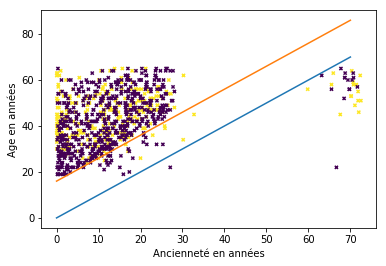

In [ ]:
plt.scatter(data["anciente"]/12, data["age"], c=data["cartevpr"], s = 10, marker="x")
plt.plot([0,70], [0, 70])
plt.plot([0,70], [16, 86])
plt.xlabel("Ancienneté en années")
plt.ylabel("Age en années")

- Les personnes en dessous de la ligne bleue ont une ancienneté plus grande que leur âge. Ce qui est illogique.
- Les personnes en dessous de la ligne rouge ont un rapport age/ancienneté qui implique que leur compte a été ouvert avant qu'ils aient 16 ans. Puisqu'on ne connait pas les règles de la banque. Nous garderons les entrées avec les personnes ayant moins de 16 ans à l'ouverture.

In [ ]:
data = data[data["anciente"]/12 < data["age"]] # On ne garde que les entrées qui font que age>ancienneté

# Analyse du Dataset

In [ ]:
quanti = data.select_dtypes(exclude=['category'])
correlation = quanti.corr()

## Matrice des corrélations

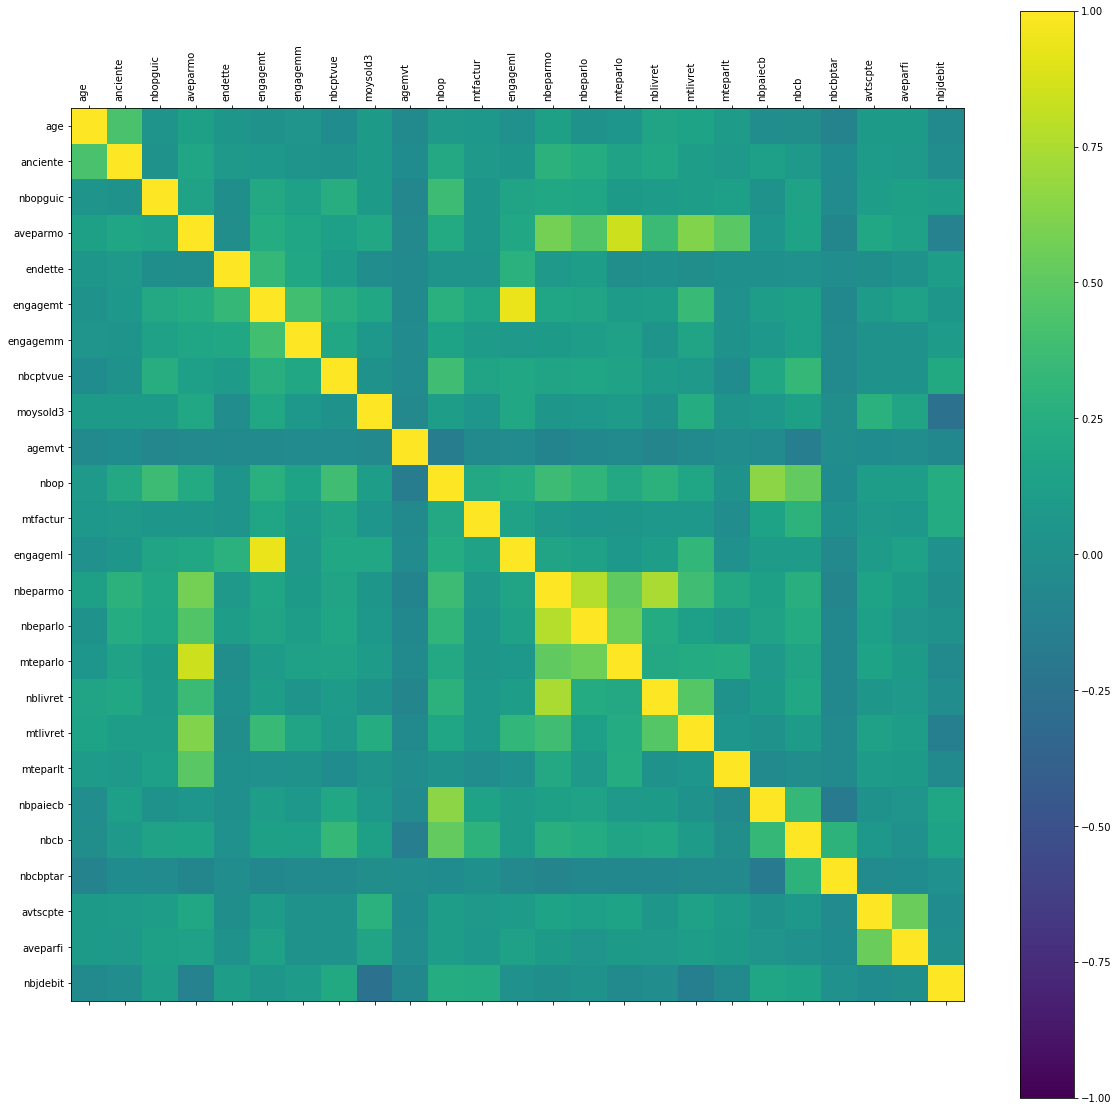

In [ ]:
fig, ax = plt.subplots(figsize=(20,20))
cax = ax.matshow(correlation, vmin=-1, vmax=1, interpolation='none')
fig.colorbar(cax)
ax.set_xticks([x for x in range(len(quanti.columns))])
ax.set_xticklabels(quanti.columns, rotation=90, horizontalalignment='right')

ax.set_yticks([x for x in range(len(quanti.columns))])
ax.set_yticklabels(quanti.columns)

plt.show()

In [ ]:
quanti.describe()

,age,anciente,nbopguic,aveparmo,endette,engagemt,engagemm,nbcptvue,moysold3,agemvt,nbop,mtfactur,engageml,nbeparmo,nbeparlo,mteparlo,nblivret,mtlivret,mteparlt,nbpaiecb,nbcb,nbcbptar,avtscpte,aveparfi,nbjdebit
count,865.000000,865.000000,865.000000,865.000000,865.000000,8.650000e+02,8.650000e+02,865.000000,865.000000,865.000000,865.000000,865.000000,8.650000e+02,865.000000,865.000000,865.000000,865.000000,865.000000,865.000000,865.000000,865.000000,865.000000,8.650000e+02,8.650000e+02,865.000000
mean,42.490173,137.876301,1.694798,59860.010405,6.091329,8.451213e+04,2.166749e+04,1.121387,11539.372254,20.331792,32.705202,22884.157225,5.840576e+04,1.512139,0.646243,34045.098266,0.800000,20977.339884,4837.572254,11.838853,1.165318,0.146821,1.573746e+05,5.264373e+04,13.301734
std,11.383476,94.587223,2.903029,116749.747027,12.995182,2.566999e+05,7.921761e+04,0.402904,24882.023345,52.520386,27.015038,64723.768493,2.352977e+05,1.341176,0.814901,78368.198903,0.796695,52458.163412,36101.763586,11.224569,0.849400,0.397262,8.111774e+05,3.660407e+05,24.025744
min,19.000000,1.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,-70050.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000
25%,34.000000,48.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,1.000000,1316.000000,13.000000,11.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,1.000000,0.000000,4.815000e+03,0.000000e+00,0.000000
50%,42.000000,137.000000,1.000000,8835.000000,0.000000,0.000000e+00,0.000000e+00,1.000000,5134.000000,13.000000,28.000000,0.000000,0.000000e+00,1.000000,0.000000,0.000000,1.000000,183.000000,0.000000,11.500629,1.000000,0.000000,2.706100e+04,0.000000e+00,0.000000
75%,51.000000,211.000000,2.000000,63516.000000,8.000000,4.917200e+04,0.000000e+00,1.000000,11637.000000,14.000000,47.000000,7000.000000,0.000000e+00,2.000000,1.000000,27451.000000,1.000000,22100.000000,0.000000,16.000000,2.000000,0.000000,1.165520e+05,8.980000e+02,14.000000
max,65.000000,393.000000,28.000000,901767.000000,99.000000,3.472938e+06,1.618242e+06,4.000000,241827.000000,944.000000,262.000000,880660.000000,3.472938e+06,9.000000,4.000000,579603.000000,4.000000,559730.000000,559559.000000,69.000000,5.000000,4.000000,1.985624e+07,7.066619e+06,114.000000


## Histogrammes

''

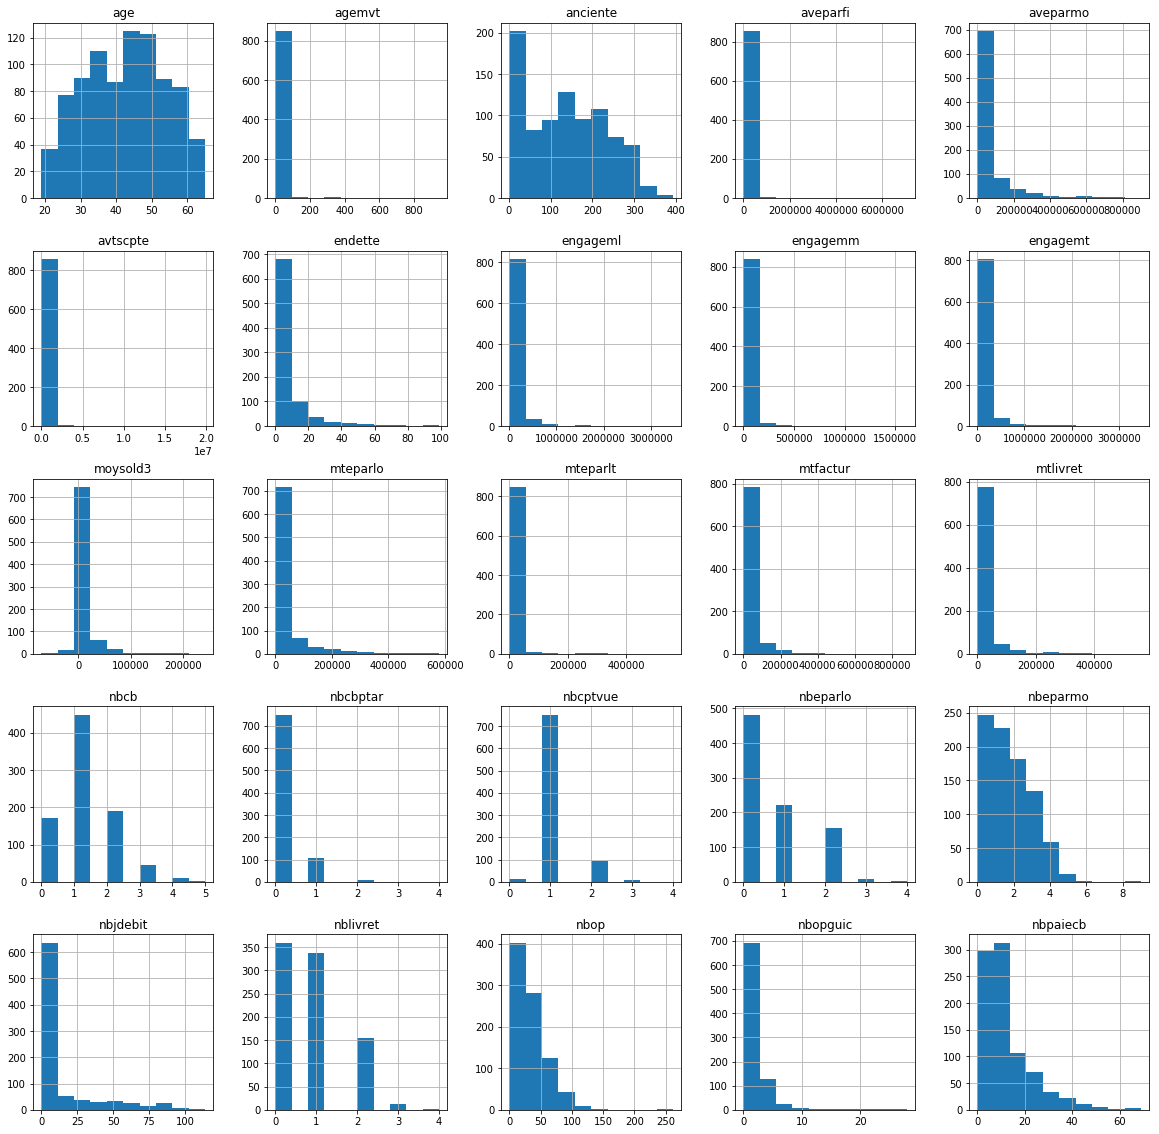

In [ ]:
quanti.hist(figsize=(20,20))
""

## Barplot des variables catégorielles

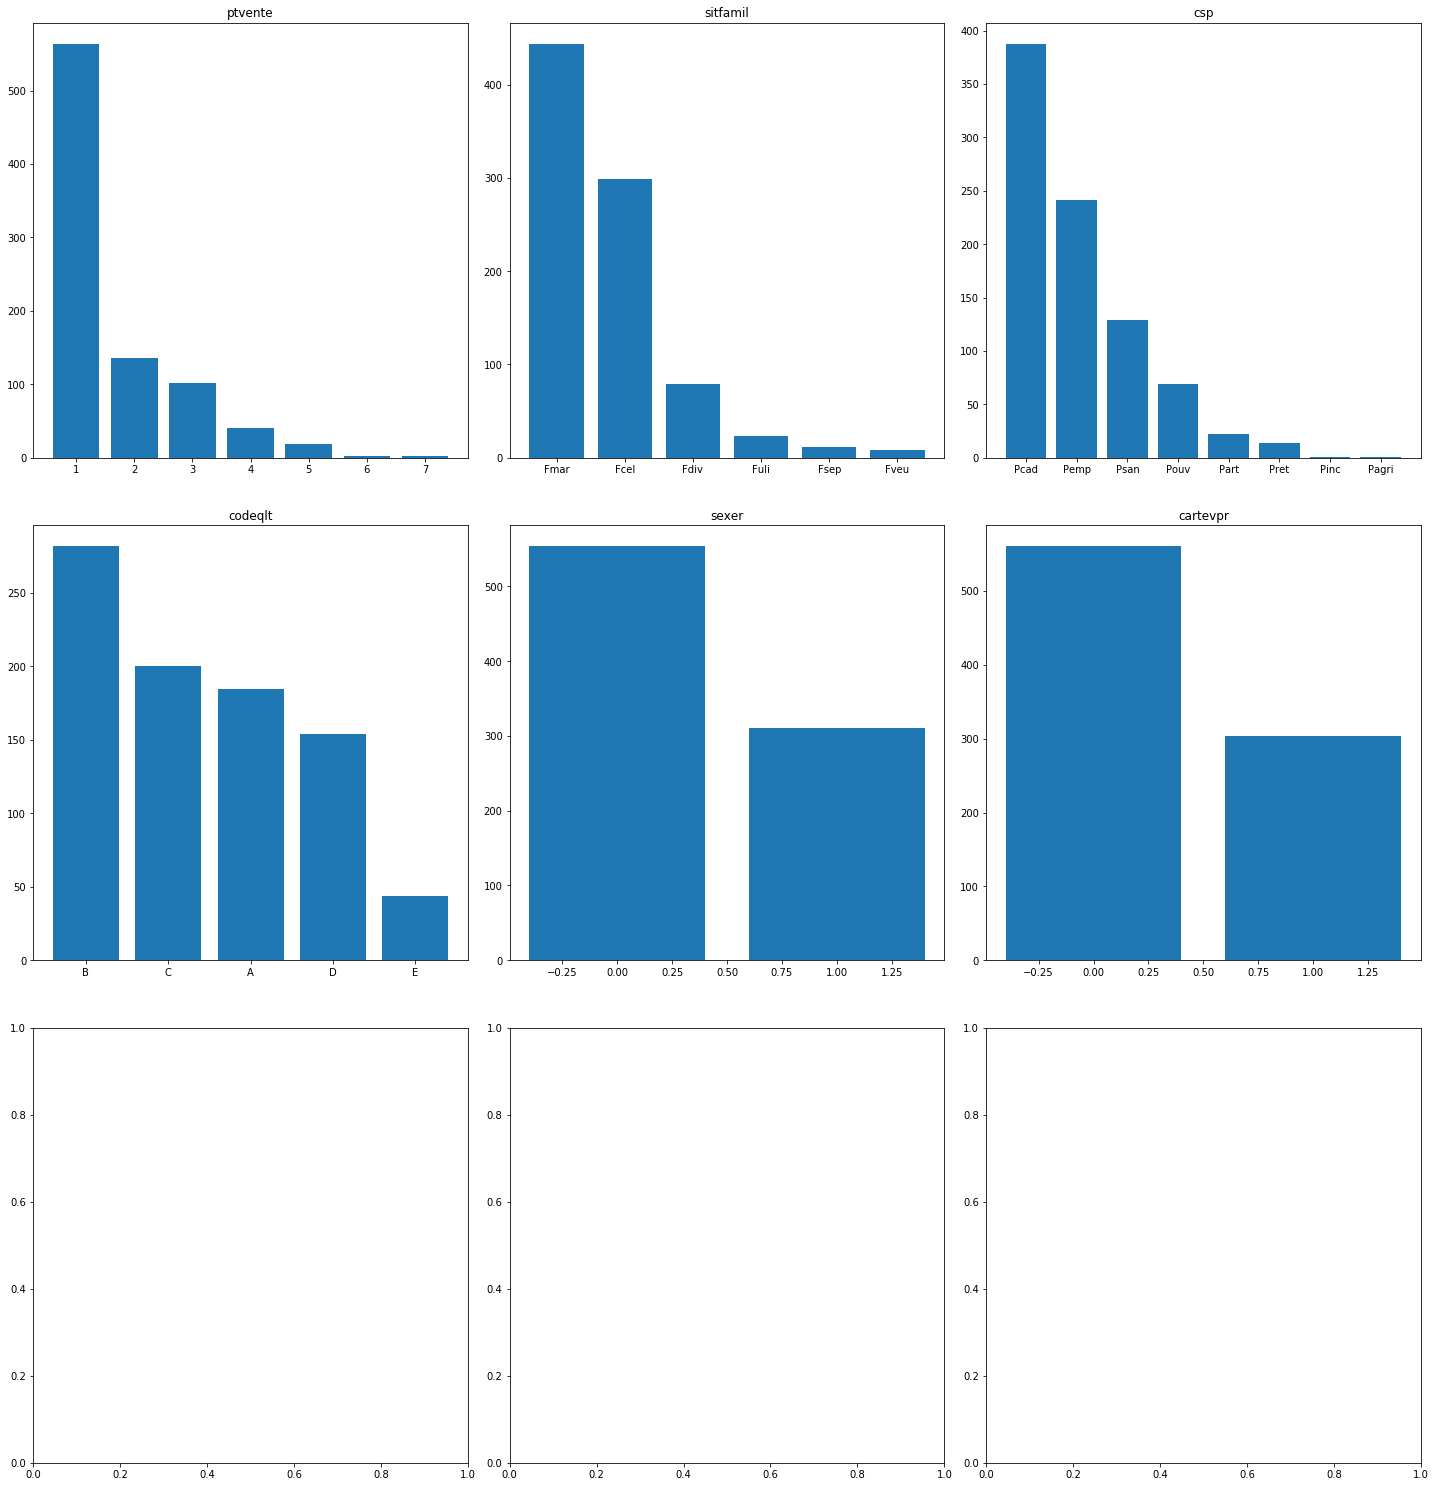

In [ ]:
quali = data.select_dtypes(include=['category'])
fig, axs = plt.subplots(3, 3, figsize=(20, 10))
fig.tight_layout()
fig.subplots_adjust(top=3, bottom=1)

for i, col in enumerate(quali.columns):
    counts = quali[col].value_counts()
    axs[i//3, i%3].bar(counts.index, counts)
    axs[i//3, i%3].set_title(col)

## Barplot des variables catégorielles

In [ ]:
variable = "codeqlt"
data_a_carte = data[data["cartevpr"]==1]
data_pas_carte = data[data["cartevpr"]==0]

In [ ]:
codeqlt_a = data_a_carte[variable].value_counts().sort_index()

In [ ]:
codeqlt_pas = data_pas_carte[variable].value_counts().sort_index()

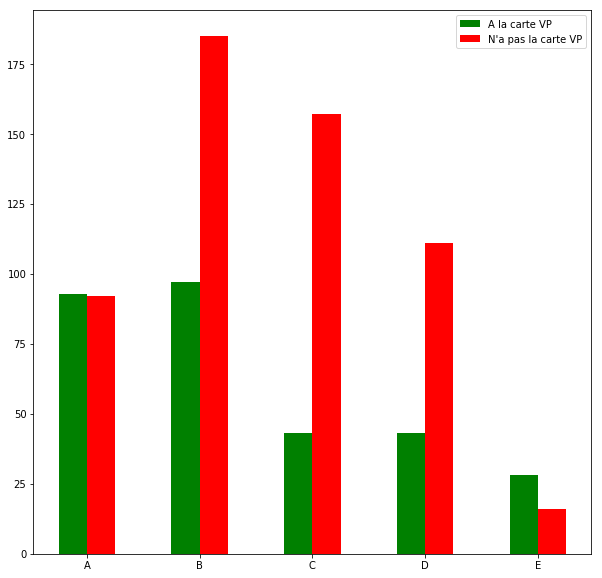

In [ ]:
idx = np.arange(len(codeqlt_a.index)) * 2
width=  0.5
plt.figure(figsize=(10,10))
plt.bar(idx, codeqlt_a, width, label="A la carte VP", color="green")
plt.bar(idx + width, codeqlt_pas, width, label = "N'a pas la carte VP", color="red")
plt.xticks(idx + width / 2, codeqlt_a.index)
plt.legend()
plt.show()

## Statistiques par département

In [ ]:
import pygal_maps_fr.maps as pygalfr
from IPython.display import display, HTML

base_html = """
<!DOCTYPE html>
<html>
  <head>
  <script type="text/javascript" src="http://kozea.github.com/pygal.js/javascripts/svg.jquery.js"></script>
  <script type="text/javascript" src="https://kozea.github.io/pygal.js/2.0.x/pygal-tooltips.min.js""></script>
  </head>
  <body>
    <figure>
      {rendered_chart}
    </figure>
  </body>
</html>
"""

def galplot(chart):
    rendered_chart = chart.render(is_unicode=True)
    plot_html = base_html.format(rendered_chart=rendered_chart)
    display(HTML(plot_html))

In [ ]:
dict_n_clients={}
for ind, count in data["departem"].value_counts().items():
    ind = ind.zfill(2)
    if ind == '97':
        ind='971'
    dict_n_clients[ind] = count

In [ ]:
fr_chart = pygalfr.Departments(human_readable=True)
fr_chart.title = 'Nombre de clients par département'
fr_chart.add('Nombre de clients', dict_n_clients)
fr_chart.render()
galplot(fr_chart)

In [ ]:
dict_taux={}
departem_a_carte = data_a_carte["departem"].value_counts()
departem_pas_carte = data_pas_carte["departem"].value_counts()
for ind, a_carte_count in departem_a_carte.items():
    pas_carte_count = departem_pas_carte.loc[ind]
    ind = ind.zfill(2)
    if ind == '97':
        ind = '971'
    dict_taux[ind] =  a_carte_count/(pas_carte_count+1)

In [ ]:
fr_chart = pygalfr.Departments(human_readable=True)
fr_chart.title = 'Taux affectation VP par département'
fr_chart.add('Taux affectation VP', dict_taux)
fr_chart.render()
galplot(fr_chart)

In [ ]:
from pygal_maps_fr.maps import aggregate_regions
fr_chart = pygalfr.Regions(human_readable=True)
fr_chart.title = 'Taux affectation par région'
fr_chart.add('Taux', aggregate_regions(dict_taux))
fr_chart.render()
galplot(fr_chart)

# Test des modèles

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor


from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.svm import LinearSVC

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

from sklearn.metrics import f1_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc
from sklearn.metrics import classification_report

import warnings
warnings.filterwarnings('ignore')

## Données quantitatives seulement (Prétraitement 1)

In [ ]:
centered_quanti = (quanti-quanti.mean())/quanti.std()
validation_size = 0.3
seed = 7
X_train, X_validation, Y_train, Y_validation = train_test_split(centered_quanti, data["cartevpr"], test_size=validation_size, random_state=seed)

In [ ]:
num_folds = 10
seed = 7
scoring = 'f1'
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('QDA', QuadraticDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('RF', RandomForestClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM_LIN', SVC(kernel="linear", probability=True)))
models.append(('SVM_POLY', SVC(kernel="poly", probability=True)))
models.append(('SVM_RBF', SVC(kernel="rbf", probability=True)))

results = []
names = []
for name, model in models:
	kfold = KFold(n_splits=num_folds, shuffle=True, random_state=seed)
	cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)

LR: 0.774027 (0.090983)
LDA: 0.742123 (0.078643)
QDA: 0.611946 (0.119841)
KNN: 0.636878 (0.124438)
CART: 0.794776 (0.047192)
RF: 0.847342 (0.061640)
NB: 0.597386 (0.119461)
SVM_LIN: 0.795506 (0.074077)
SVM_POLY: 0.436726 (0.155374)
SVM_RBF: 0.786553 (0.070234)


In [ ]:
for name, model in models:
	model.fit(X_train, Y_train)

| LR | 83.46 | 0.7994 | 0.8004 |
                  precision    recall  f1-score   support

Non Visa Premier     0.8579    0.9106    0.8835       179
    Visa Premier     0.7714    0.6667    0.7152        81

        accuracy                         0.8346       260
       macro avg     0.8147    0.7886    0.7994       260
    weighted avg     0.8310    0.8346    0.8311       260

| LDA | 81.54 | 0.7695 | 0.7936 |
                  precision    recall  f1-score   support

Non Visa Premier     0.8325    0.9162    0.8723       179
    Visa Premier     0.7619    0.5926    0.6667        81

        accuracy                         0.8154       260
       macro avg     0.7972    0.7544    0.7695       260
    weighted avg     0.8105    0.8154    0.8083       260

| QDA | 76.54 | 0.6888 | 0.7087 |
                  precision    recall  f1-score   support

Non Visa Premier     0.7810    0.9162    0.8432       179
    Visa Premier     0.7000    0.4321    0.5344        81

        accuracy     

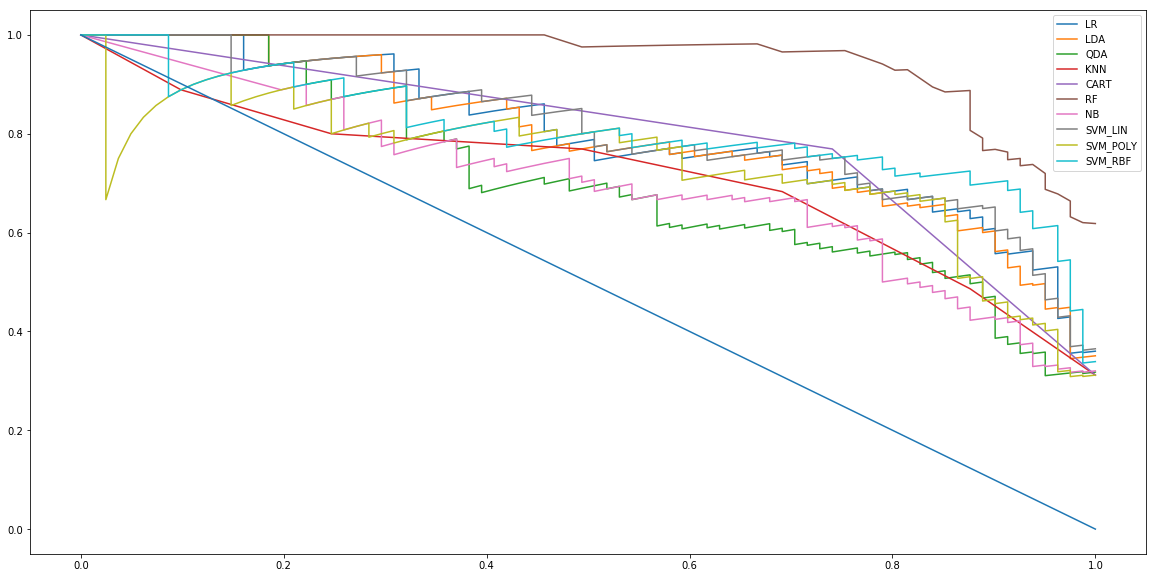

In [ ]:
fig, ax = plt.subplots(figsize=(20, 10))
i=0
for name, model in models:
    pred_prob = model.predict_proba(X_validation)
    pred = model.predict(X_validation)
    accuracy = (pred == Y_validation).sum()/len(X_validation) * 100
    fscore = f1_score(Y_validation, pred, average='macro')
    precision, recall, thresholds = precision_recall_curve(Y_validation, pred_prob[:,1])

    print("| {} | {:.2f} | {:.4F} | {:.4f} |".format(name, accuracy, fscore, auc(recall, precision)))
    print(classification_report(Y_validation, pred, target_names=["Non Visa Premier", "Visa Premier"], digits=4))

    ax.plot(recall, precision, label=name)

    i+=1
plt.plot([0,1], [1, 0])
plt.legend()

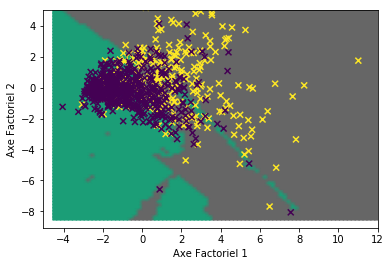

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
centered_quanti = (quanti - quanti.mean())/quanti.std()
X_train_pca = pca.fit_transform(centered_quanti)

# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = X_train_pca[:,0].min() - .5, X_train_pca[:,0].max() + .5
y_min, y_max = X_train_pca[:,1].min() - .5, X_train_pca[:,1].max() + .5
h = 0.2  # step size in the mesh
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = models[5][1].predict(pca.inverse_transform(np.c_[xx.ravel(), yy.ravel()]))

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Dark2, shading="gouraud")


plt.scatter(X_train_pca[:,0], X_train_pca[:,1], c = data["cartevpr"], marker="x")
plt.xlim(X_train_pca[:,0].min()-1, 12)
plt.ylim(X_train_pca[:,1].min()-1, 5)
plt.xlabel("Axe Factoriel 1")
plt.ylabel("Axe Factoriel 2")
plt.show()

## Données quantitatives : SMOTED (Prétraitement 2)

In [ ]:
s = SMOTE()
X_train_smote, Y_train_smote = s.fit_sample(X_train, Y_train)

In [ ]:
num_folds = 20
seed = 7
scoring = 'f1'
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('QDA', QuadraticDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('RF', RandomForestClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM_LIN', SVC(kernel="linear", probability=True)))
models.append(('SVM_POLY', SVC(kernel="poly", probability=True)))
models.append(('SVM_RBF', SVC(kernel="rbf", probability=True)))
results = []
names = []
for name, model in models:
	kfold = KFold(n_splits=num_folds, shuffle=True, random_state=seed)
	cv_results = cross_val_score(model, X_train_smote, Y_train_smote, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)

LR: 0.848312 (0.062847)
LDA: 0.838343 (0.060761)
QDA: 0.659780 (0.096211)
KNN: 0.813539 (0.053601)
CART: 0.860302 (0.059345)
RF: 0.918527 (0.047804)
NB: 0.677746 (0.081807)
SVM_LIN: 0.851366 (0.061485)
SVM_POLY: 0.682419 (0.090917)
SVM_RBF: 0.873703 (0.055663)


In [ ]:
for name, model in models:
	model.fit(X_train, Y_train)

| LR | 83.46 | 0.7994 | 0.8004 |
                  precision    recall  f1-score   support

Non Visa Premier     0.8579    0.9106    0.8835       179
    Visa Premier     0.7714    0.6667    0.7152        81

        accuracy                         0.8346       260
       macro avg     0.8147    0.7886    0.7994       260
    weighted avg     0.8310    0.8346    0.8311       260

| LDA | 81.54 | 0.7695 | 0.7936 |
                  precision    recall  f1-score   support

Non Visa Premier     0.8325    0.9162    0.8723       179
    Visa Premier     0.7619    0.5926    0.6667        81

        accuracy                         0.8154       260
       macro avg     0.7972    0.7544    0.7695       260
    weighted avg     0.8105    0.8154    0.8083       260

| QDA | 76.54 | 0.6888 | 0.7087 |
                  precision    recall  f1-score   support

Non Visa Premier     0.7810    0.9162    0.8432       179
    Visa Premier     0.7000    0.4321    0.5344        81

        accuracy     

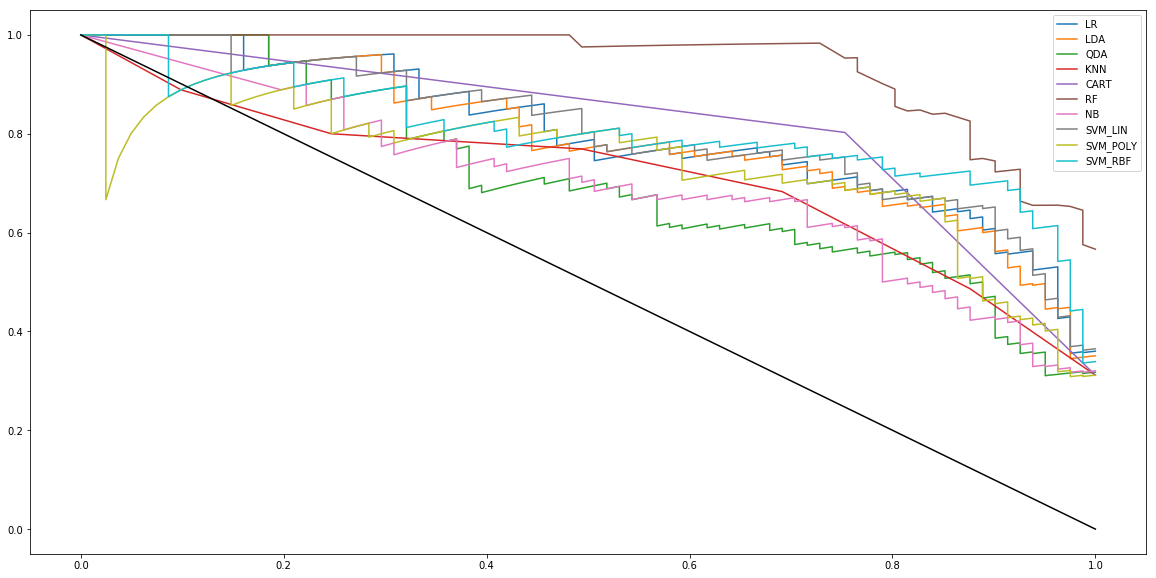

In [ ]:
fig, ax = plt.subplots(figsize=(20, 10))
i=0
for name, model in models:
    pred_prob = model.predict_proba(X_validation)
    pred = model.predict(X_validation)
    accuracy = (pred == Y_validation).sum()/len(X_validation) * 100
    fscore = f1_score(Y_validation, pred, average='macro')
    precision, recall, thresholds = precision_recall_curve(Y_validation, pred_prob[:,1])

    print("| {} | {:.2f} | {:.4F} | {:.4f} |".format(name, accuracy, fscore, auc(recall, precision)))
    print(classification_report(Y_validation, pred, target_names=["Non Visa Premier", "Visa Premier"], digits=4))

    ax.plot(recall, precision, label=name)

    i+=1
plt.plot([0,1], [1, 0], color="black")
plt.legend()

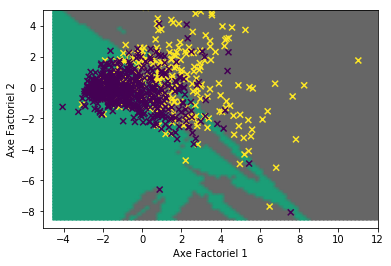

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
centered_quanti = (quanti - quanti.mean())/quanti.std()
X_train_pca = pca.fit_transform(centered_quanti)

# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = X_train_pca[:,0].min() - .5, X_train_pca[:,0].max() + .5
y_min, y_max = X_train_pca[:,1].min() - .5, X_train_pca[:,1].max() + .5
h = 0.2  # step size in the mesh
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

Z = models[5][1].predict(pca.inverse_transform(np.c_[xx.ravel(), yy.ravel()]))

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Dark2, shading="gouraud")


plt.scatter(X_train_pca[:,0], X_train_pca[:,1], c = data["cartevpr"], marker="x")
plt.xlim(X_train_pca[:,0].min()-1, 12)
plt.ylim(X_train_pca[:,1].min()-1, 5)
plt.xlabel("Axe Factoriel 1")
plt.ylabel("Axe Factoriel 2")
plt.show()

## Toutes les variables avec One Hot Encoding  (Prétraitements 3 et 4)

In [ ]:
cat_cols = list(data.select_dtypes(include=['category']).columns)
cat_cols.remove("codeqlt") # traité à part
cat_cols = [x for x in cat_cols if x!="cartevpr"]

In [ ]:
data_one_hot = data.drop('cartevpr', axis=1)

In [ ]:
for name in cat_cols:
    one_hot = pd.get_dummies(data_one_hot[name], prefix=name)
    data_one_hot = data_one_hot.drop(columns=[name])
    data_one_hot = pd.concat([data_one_hot, one_hot], axis=1)
data_one_hot.head()


,age,anciente,codeqlt,nbopguic,aveparmo,endette,engagemt,engagemm,nbcptvue,moysold3,agemvt,nbop,mtfactur,engageml,nbeparmo,nbeparlo,mteparlo,nblivret,mtlivret,mteparlt,nbpaiecb,nbcb,nbcbptar,avtscpte,aveparfi,nbjdebit,ptvente_1,ptvente_2,ptvente_3,ptvente_4,ptvente_5,ptvente_6,ptvente_7,sitfamil_Fcel,sitfamil_Fdiv,sitfamil_Fmar,sitfamil_Fsep,sitfamil_Fuli,sitfamil_Fveu,csp_Pagri,csp_Part,csp_Pcad,csp_Pemp,csp_Pinc,csp_Pouv,csp_Pret,csp_Psan,sexer_0,sexer_1
0,51.0,238.0,A,0.0,701939.0,4.0,119216.0,119216.0,2.0,35938.0,11.0,49.0,206016.0,0.0,4.0,2.0,520145.0,2.0,181794.0,0.0,14.0,2.0,0.0,1303700.0,556967.0,1.0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0
1,52.0,270.0,A,4.0,8920.0,0.0,0.0,0.0,1.0,132468.0,11.0,50.0,98500.0,0.0,3.0,2.0,8920.0,0.0,0.0,0.0,5.0,2.0,0.0,19856243.0,133896.0,0.0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0
2,58.0,139.0,C,0.0,3402.0,0.0,0.0,0.0,1.0,1336.0,14.0,2.0,3394.0,0.0,1.0,0.0,0.0,1.0,3402.0,0.0,0.0,1.0,0.0,122745.0,0.0,0.0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0
3,27.0,99.0,B,0.0,76321.0,0.0,0.0,0.0,1.0,12221.0,11.0,23.0,0.0,0.0,3.0,1.0,46312.0,2.0,30009.0,0.0,14.0,2.0,0.0,83224.0,0.0,0.0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0
4,49.0,89.0,A,0.0,473350.0,0.0,209062.0,171203.0,1.0,21187.0,11.0,49.0,0.0,0.0,5.0,3.0,399999.0,2.0,73351.0,0.0,11.0,3.0,1.0,494773.0,21423.0,15.0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0


In [ ]:
mapper = list(zip(data["codeqlt"].unique(), list(range(len(data["codeqlt"].unique())))))

In [ ]:
mapper = dict(mapper)

In [ ]:
data_one_hot["codeqlt"] = data_one_hot["codeqlt"].replace(mapper)

In [ ]:
data_one_hot = (data_one_hot - data_one_hot.mean())/data_one_hot.std()
validation_size = 0.30
seed = 7
X_train, X_validation, Y_train, Y_validation = train_test_split(data_one_hot, data["cartevpr"], test_size=validation_size, random_state=seed)

In [ ]:
# Ne pas exécuter pour tester sans smote
s = SMOTE()
X_train, Y_train = s.fit_sample(X_train, Y_train)

In [ ]:
num_folds = 10
seed = 7
scoring = 'f1'
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('QDA', QuadraticDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('RF', RandomForestClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM_LIN', SVC(kernel="linear", probability=True)))
models.append(('SVM_POLY', SVC(kernel="poly", probability=True)))
models.append(('SVM_RBF', SVC(kernel="rbf", probability=True)))
results = []
names = []
for name, model in models:
	kfold = KFold(n_splits=num_folds, shuffle=True, random_state=seed)
	cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)

LR: 0.872000 (0.052848)
LDA: 0.848928 (0.053260)
QDA: 0.673828 (0.073231)
KNN: 0.795283 (0.069720)
CART: 0.844182 (0.058711)
RF: 0.912113 (0.042699)
NB: 0.715891 (0.067425)
SVM_LIN: 0.869447 (0.059088)
SVM_POLY: 0.832334 (0.073412)
SVM_RBF: 0.883255 (0.046340)


In [ ]:
for name, model in models:
	model.fit(X_train, Y_train)

| LR | 86.15 | 0.8417 | 0.8210 |
                  precision    recall  f1-score   support

Non Visa Premier     0.9133    0.8827    0.8977       179
    Visa Premier     0.7586    0.8148    0.7857        81

        accuracy                         0.8615       260
       macro avg     0.8360    0.8487    0.8417       260
    weighted avg     0.8651    0.8615    0.8628       260

| LDA | 85.38 | 0.8329 | 0.8107 |
                  precision    recall  f1-score   support

Non Visa Premier     0.9075    0.8771    0.8920       179
    Visa Premier     0.7471    0.8025    0.7738        81

        accuracy                         0.8538       260
       macro avg     0.8273    0.8398    0.8329       260
    weighted avg     0.8575    0.8538    0.8552       260

| QDA | 70.38 | 0.5945 | 0.4950 |
                  precision    recall  f1-score   support

Non Visa Premier     0.7361    0.8883    0.8051       179
    Visa Premier     0.5455    0.2963    0.3840        81

        accuracy     

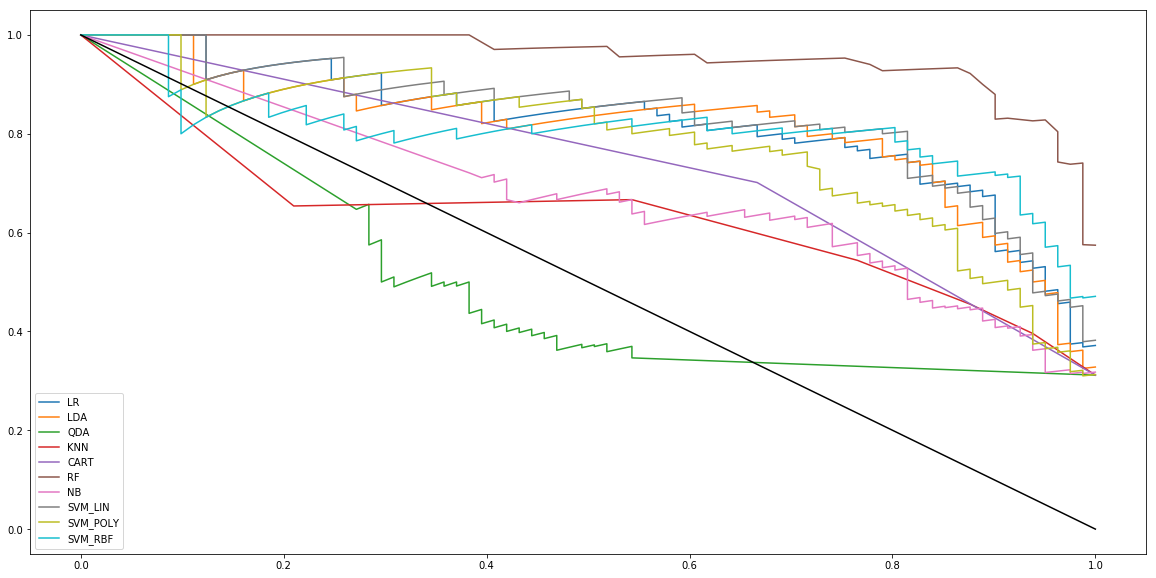

In [ ]:
fig, ax = plt.subplots(figsize=(20, 10))
i=0
for name, model in models:
    pred_prob = model.predict_proba(X_validation)
    pred = model.predict(X_validation)
    accuracy = (pred == Y_validation).sum()/len(X_validation) * 100
    fscore = f1_score(Y_validation, pred, average='macro')
    precision, recall, thresholds = precision_recall_curve(Y_validation, pred_prob[:,1])

    print("| {} | {:.2f} | {:.4F} | {:.4f} |".format(name, accuracy, fscore, auc(recall, precision)))
    print(classification_report(Y_validation, pred, target_names=["Non Visa Premier", "Visa Premier"], digits=4))

    ax.plot(recall, precision, label=name)

    i+=1
plt.plot([0,1], [1, 0], color="black")
plt.legend()

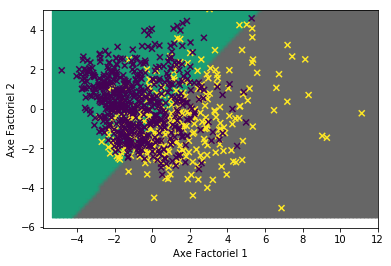

In [ ]:
pca = PCA(n_components=2)
centered_one_hot = (data_one_hot - data_one_hot.mean())/data_one_hot.std()
X_train_pca = pca.fit_transform(centered_one_hot)

# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = X_train_pca[:,0].min() - .5, X_train_pca[:,0].max() + .5
y_min, y_max = X_train_pca[:,1].min() - .5, X_train_pca[:,1].max() + .5
h = 0.2  # step size in the mesh
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

Z = models[1][1].predict(pca.inverse_transform(np.c_[xx.ravel(), yy.ravel()]))

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Dark2, shading="gouraud")


plt.scatter(X_train_pca[:,0], X_train_pca[:,1], c = data["cartevpr"], marker="x")
plt.xlim(X_train_pca[:,0].min()-1, 12)
plt.ylim(X_train_pca[:,1].min()-1, 5)
plt.xlabel("Axe Factoriel 1")
plt.ylabel("Axe Factoriel 2")
plt.show()

| RF | 93.85 | 0.8974 | 0.9526 |


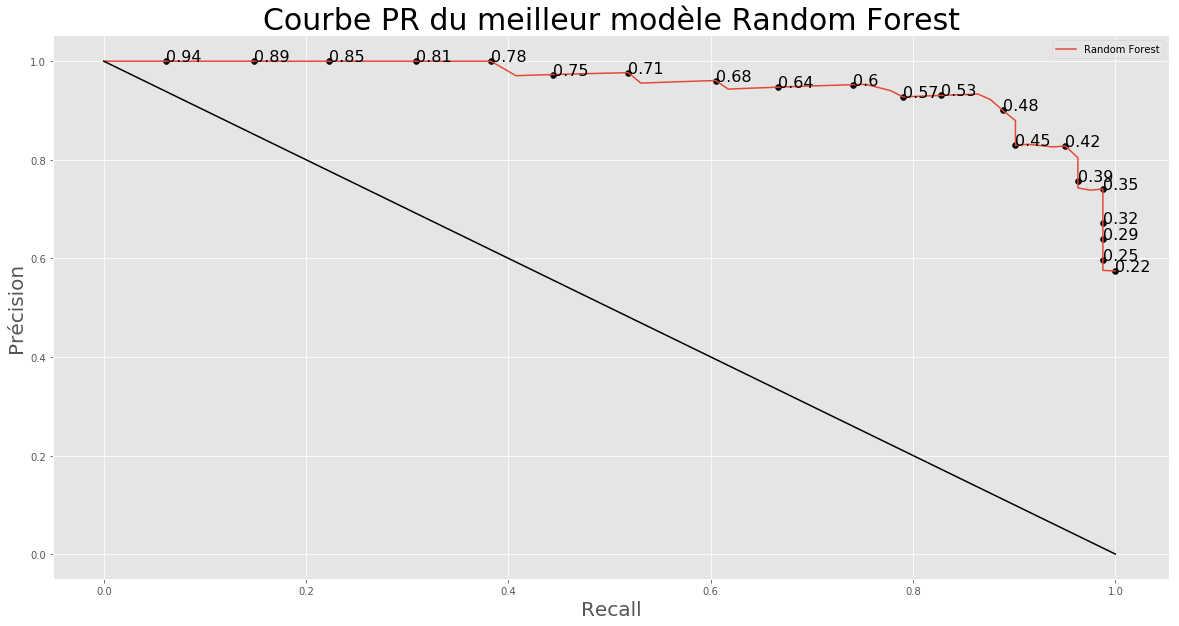

In [ ]:
plt.style.use('ggplot')
fig, ax = plt.subplots(figsize=(20, 10))
rf = models[5][1]
pred_prob = rf.predict_proba(X_validation)
pred = rf.predict(X_validation)
accuracy = (pred == Y_validation).sum()/len(X_validation) * 100
fscore = f1_score(Y_validation, pred)
precision, recall, thresholds = precision_recall_curve(Y_validation, pred_prob[:,1])

print("| {} | {:.2f} | {:.4F} | {:.4f} |".format("RF", accuracy, fscore, auc(recall, precision)))
ax.plot(recall, precision, label="Random Forest")
plt.xlabel("Recall", fontsize=20)
plt.ylabel("Précision", fontsize=20)
plt.title("Courbe PR du meilleur modèle Random Forest", fontsize=30)
for i,xety in enumerate(list(zip(recall, precision))):
    if i%3 !=0:
        continue
    if i < len(thresholds):
        plt.annotate(thresholds[i], xy= xety, fontsize=16)
        plt.scatter(xety[0], xety[1], color="black")

plt.plot([0,1], [1, 0], color="black")
plt.legend()

### Tune RF

| RF(100) | 91.15 | 0.8965 | 0.9375 |
| RF(200) | 93.46 | 0.9240 | 0.9485 |
| RF(300) | 91.54 | 0.9007 | 0.9436 |
| RF(400) | 93.85 | 0.9267 | 0.9515 |
| RF(500) | 93.08 | 0.9187 | 0.9524 |
| RF(600) | 92.69 | 0.9151 | 0.9430 |
| RF(700) | 92.31 | 0.9097 | 0.9477 |
| RF(800) | 92.69 | 0.9145 | 0.9456 |
| RF(900) | 92.31 | 0.9091 | 0.9461 |
| RF(1000) | 92.31 | 0.9091 | 0.9511 |


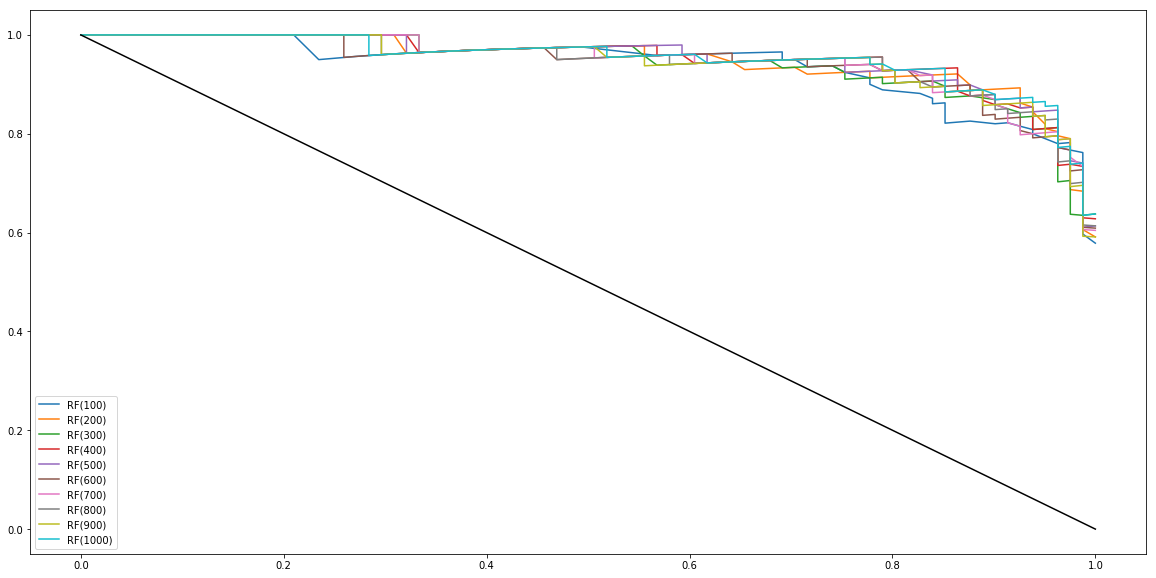

In [ ]:
fig, ax = plt.subplots(figsize=(20, 10))

for ntree in range(100, 1001, 100):
    rftuned = RandomForestClassifier(n_estimators=ntree, n_jobs=4)
    rftuned.fit(X_train, Y_train)
    pred_prob = rftuned.predict_proba(X_validation)
    pred = rftuned.predict(X_validation)
    accuracy = (pred == Y_validation).sum()/len(X_validation) * 100
    fscore = f1_score(Y_validation, pred, average='macro')
    precision, recall, thresholds = precision_recall_curve(Y_validation, pred_prob[:,1])

    print("| {} | {:.2f} | {:.4F} | {:.4f} |".format("RF("+str(ntree)+")", accuracy, fscore, auc(recall, precision)))
    ax.plot(recall, precision, label="RF("+str(ntree)+")")

plt.plot([0,1], [1, 0], color="black")
plt.legend()

### Tune KNN

| KNN(1) | 0.70 | 0.6684 | 0.6246 |
| KNN(2) | 0.71 | 0.6467 | 0.6055 |
| KNN(3) | 0.70 | 0.6828 | 0.6048 |
| KNN(4) | 0.74 | 0.7046 | 0.6339 |
| KNN(5) | 0.73 | 0.7087 | 0.6317 |
| KNN(6) | 0.78 | 0.7553 | 0.6591 |
| KNN(7) | 0.75 | 0.7311 | 0.6623 |
| KNN(8) | 0.77 | 0.7500 | 0.6650 |
| KNN(9) | 0.73 | 0.7157 | 0.6744 |
| KNN(10) | 0.76 | 0.7370 | 0.6969 |
| KNN(11) | 0.74 | 0.7262 | 0.7118 |
| KNN(12) | 0.75 | 0.7308 | 0.7213 |
| KNN(13) | 0.75 | 0.7275 | 0.7322 |
| KNN(14) | 0.75 | 0.7286 | 0.7376 |
| KNN(15) | 0.75 | 0.7369 | 0.7442 |
| KNN(16) | 0.77 | 0.7489 | 0.7465 |
| KNN(17) | 0.78 | 0.7662 | 0.7497 |
| KNN(18) | 0.78 | 0.7620 | 0.7496 |
| KNN(19) | 0.78 | 0.7605 | 0.7545 |
| KNN(20) | 0.78 | 0.7656 | 0.7484 |
| KNN(21) | 0.78 | 0.7652 | 0.7392 |
| KNN(22) | 0.78 | 0.7584 | 0.7410 |
| KNN(23) | 0.77 | 0.7533 | 0.7408 |
| KNN(24) | 0.77 | 0.7465 | 0.7417 |
| KNN(25) | 0.78 | 0.7625 | 0.7411 |
| KNN(26) | 0.77 | 0.7569 | 0.7450 |
| KNN(27) | 0.77 | 0.7579 | 0.7428 |
| KNN(28) 

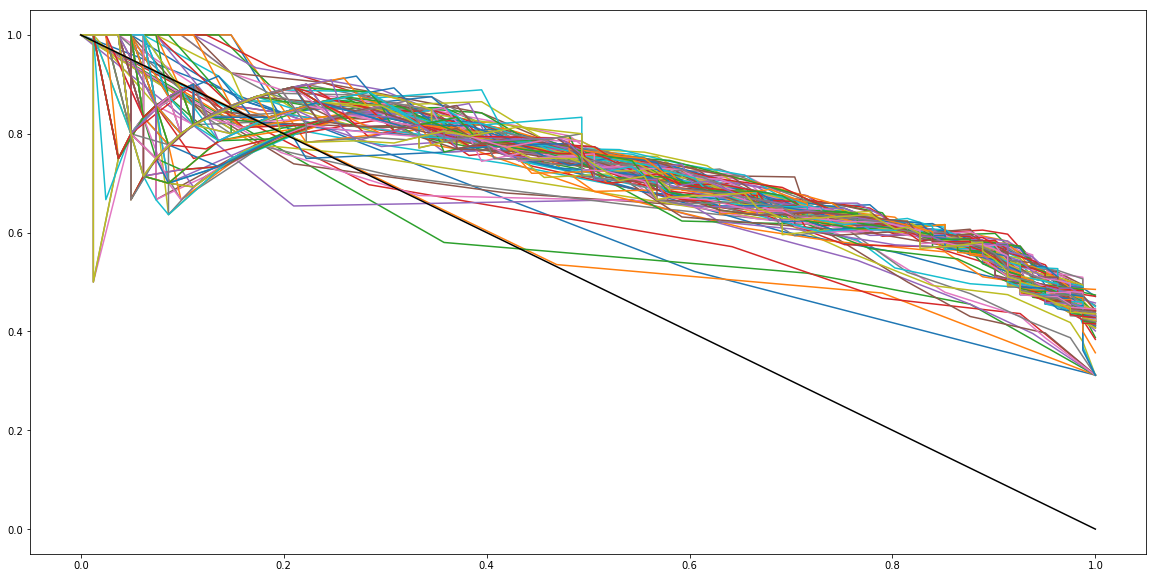

In [ ]:
fig, ax = plt.subplots(figsize=(20, 10))
accs = []
fscores= []
aucs=[]
for k in range(1, 100):
    rftuned = KNeighborsClassifier(n_neighbors=k)
    rftuned.fit(X_train, Y_train)
    pred_prob = rftuned.predict_proba(X_validation)
    pred = rftuned.predict(X_validation)
    accuracy = (pred == Y_validation).sum()/len(X_validation)
    fscore = f1_score(Y_validation, pred, average='macro')
    precision, recall, thresholds = precision_recall_curve(Y_validation, pred_prob[:,1])

    print("| {} | {:.2f} | {:.4F} | {:.4f} |".format("KNN("+str(k)+")", accuracy, fscore, auc(recall, precision)))
    accs.append(accuracy)
    fscores.append(fscore)
    aucs.append(auc(recall, precision))
    ax.plot(recall, precision, label="KNN("+str(k)+")")

plt.plot([0,1], [1, 0], color="black")

Meilleure valeur de k : 28

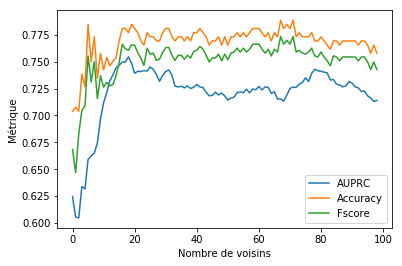

In [ ]:
plt.plot(aucs, label = "AUPRC")
plt.plot(accs, label="Accuracy")
plt.plot(fscores, label="Fscore")
plt.legend()
plt.xlabel("Nombre de voisins")
plt.ylabel("Métrique")
plt.show()

## Autres statistiques descriptives

In [ ]:
data.describe()

,age,anciente,nbopguic,aveparmo,endette,engagemt,engagemm,nbcptvue,moysold3,agemvt,nbop,mtfactur,engageml,nbeparmo,nbeparlo,mteparlo,nblivret,mtlivret,mteparlt,nbpaiecb,nbcb,nbcbptar,avtscpte,aveparfi,nbjdebit
count,865.000000,865.000000,865.000000,865.000000,865.000000,8.650000e+02,8.650000e+02,865.000000,865.000000,865.000000,865.000000,865.000000,8.650000e+02,865.000000,865.000000,865.000000,865.000000,865.000000,865.000000,865.000000,865.000000,865.000000,8.650000e+02,8.650000e+02,865.000000
mean,42.490173,137.876301,1.694798,59860.010405,6.091329,8.451213e+04,2.166749e+04,1.121387,11539.372254,20.331792,32.705202,22884.157225,5.840576e+04,1.512139,0.646243,34045.098266,0.800000,20977.339884,4837.572254,11.838853,1.165318,0.146821,1.573746e+05,5.264373e+04,13.301734
std,11.383476,94.587223,2.903029,116749.747027,12.995182,2.566999e+05,7.921761e+04,0.402904,24882.023345,52.520386,27.015038,64723.768493,2.352977e+05,1.341176,0.814901,78368.198903,0.796695,52458.163412,36101.763586,11.224569,0.849400,0.397262,8.111774e+05,3.660407e+05,24.025744
min,19.000000,1.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,-70050.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000
25%,34.000000,48.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,1.000000,1316.000000,13.000000,11.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,1.000000,0.000000,4.815000e+03,0.000000e+00,0.000000
50%,42.000000,137.000000,1.000000,8835.000000,0.000000,0.000000e+00,0.000000e+00,1.000000,5134.000000,13.000000,28.000000,0.000000,0.000000e+00,1.000000,0.000000,0.000000,1.000000,183.000000,0.000000,11.500629,1.000000,0.000000,2.706100e+04,0.000000e+00,0.000000
75%,51.000000,211.000000,2.000000,63516.000000,8.000000,4.917200e+04,0.000000e+00,1.000000,11637.000000,14.000000,47.000000,7000.000000,0.000000e+00,2.000000,1.000000,27451.000000,1.000000,22100.000000,0.000000,16.000000,2.000000,0.000000,1.165520e+05,8.980000e+02,14.000000
max,65.000000,393.000000,28.000000,901767.000000,99.000000,3.472938e+06,1.618242e+06,4.000000,241827.000000,944.000000,262.000000,880660.000000,3.472938e+06,9.000000,4.000000,579603.000000,4.000000,559730.000000,559559.000000,69.000000,5.000000,4.000000,1.985624e+07,7.066619e+06,114.000000


In [ ]:
data.select_dtypes(include=['category']).describe()

,ptvente,sitfamil,csp,codeqlt,sexer,cartevpr
count,865,865,865,865,865,865
unique,7,6,8,5,2,2
top,1,Fmar,Pcad,B,0,0
freq,564,444,388,282,554,561


In [ ]:
for n in data.select_dtypes(exclude=['category']).columns:
    if len(data[n].unique()) <5:
        print(n, " : ", len(data[n].unique()))
        print(data[n].value_counts())
        print()
        print()

nbcbptar  :  4
0.0    749
1.0    107
2.0      8
4.0      1
Name: nbcbptar, dtype: int64




# Calcul du score d'appétence

In [ ]:
def get_score_appetence(model, individu):
    return int(model.predict_proba(np.array([individu]))[0][1]*10)

In [ ]:
clf = models[5][1] # modèle RF

In [ ]:
get_score_appetence(clf, X_validation.iloc[5,:])

9

Le client précédent a un score d'appétence égal à 9, il est donc possible de lui donner une carte visa premier

In [ ]:
get_score_appetence(clf, X_validation.iloc[0,:])

1

Le client précédent quant à lui a un score d'appétence égal à 1, il est donc très peu recommandé de lui donner une carte visa premier

## Calcul du score d'appétence pour 100 clients de l'ensemble de test

In [ ]:

for i in range(100):
    print("Le Score d'appétence du client test {} est de {}/10".format(i,get_score_appetence(clf, X_validation.iloc[i,:])))

Le Score d'appétence du client test 0 est de 1/10
Le Score d'appétence du client test 1 est de 3/10
Le Score d'appétence du client test 2 est de 2/10
Le Score d'appétence du client test 3 est de 0/10
Le Score d'appétence du client test 4 est de 8/10
Le Score d'appétence du client test 5 est de 9/10
Le Score d'appétence du client test 6 est de 7/10
Le Score d'appétence du client test 7 est de 1/10
Le Score d'appétence du client test 8 est de 4/10
Le Score d'appétence du client test 9 est de 0/10
Le Score d'appétence du client test 10 est de 4/10
Le Score d'appétence du client test 11 est de 7/10
Le Score d'appétence du client test 12 est de 2/10
Le Score d'appétence du client test 13 est de 1/10
Le Score d'appétence du client test 14 est de 0/10
Le Score d'appétence du client test 15 est de 1/10
Le Score d'appétence du client test 16 est de 4/10
Le Score d'appétence du client test 17 est de 4/10
Le Score d'appétence du client test 18 est de 1/10
Le Score d'appétence du client test 19 es